Import the Libraries 

In [1]:
import pandas as pd
import numpy as np

Load The Dataset 

In [2]:
df = pd.read_csv('weather.csv')
print(df.head(10))
print(df.tail(10))

   precipitation  temp_max  temp_min  wind  weather
0            0.0      12.8       5.0   4.7  drizzle
1           10.9      10.6       2.8   4.5     rain
2            0.8      11.7       7.2   2.3     rain
3           20.3      12.2       5.6   4.7     rain
4            1.3       8.9       2.8   6.1     rain
5            2.5       4.4       2.2   2.2     rain
6            0.0       7.2       2.8   2.3     rain
7            0.0      10.0       2.8   2.0      sun
8            4.3       9.4       5.0   3.4     rain
9            1.0       6.1       0.6   3.4     rain
      precipitation  temp_max  temp_min  wind weather
1451            4.6       7.8       2.8   5.0    rain
1452            6.1       5.0       2.8   7.6    rain
1453            2.5       5.6       2.2   4.3    rain
1454            5.8       5.0       2.2   1.5    rain
1455            0.0       4.4       0.0   2.5     sun
1456            8.6       4.4       1.7   2.9    rain
1457            1.5       5.0       1.7   1.3    r

Summary Statistics:

In [3]:
print(df.describe())
print(df.info())

       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57

In [4]:
# Handle missing values
missing_data = df.isnull().sum()
print(missing_data)
df.dropna(inplace=True)

# Handle duplicates values
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)
df = df.drop_duplicates()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64
Duplicate Rows:
      precipitation  temp_max  temp_min  wind weather
188             0.0      26.7      12.8   3.8     sun
629             0.0      21.1      13.3   2.5     sun
748             0.0       9.4       0.6   2.2     sun
751             0.0      10.0       1.7   1.5     sun
863             0.0      26.7      12.8   3.8     sun
959             0.0      27.8      15.0   2.8     sun
1019            0.0      20.6      11.1   3.3     sun
1346            0.0      22.8      13.3   2.4     sun


Boxplot for each numeric attribute

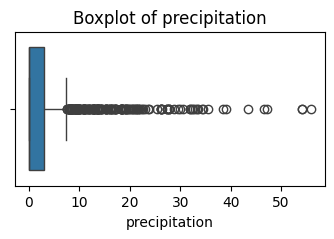

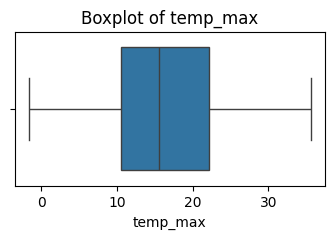

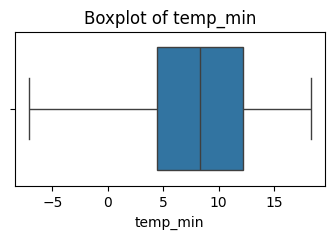

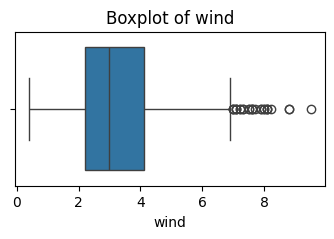

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


# slecting the numeric attributes 
numeric_columns = df.select_dtypes(include='number')

# Create a boxplot for each numeric attribute
for column in numeric_columns.columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(data=numeric_columns, x=column, orient='h')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


Handling Outliers

7.5


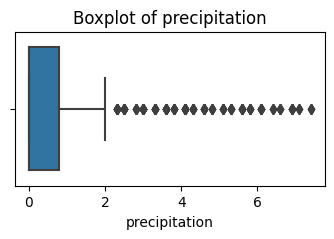

In [30]:
Q1 = df['precipitation'].quantile(0.25)
Q3 = df['precipitation'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)
# Remove outliers and create a new DataFrame without them
new_df = df[(df['precipitation'] >= lower_bound) & (df['precipitation'] <= upper_bound)]

plt.figure(figsize=(4, 2))
sns.boxplot(data=df, x=new_df['precipitation'], orient='h')
plt.title('Boxplot of precipitation')
plt.xlabel('precipitation')
plt.show()

Data Trimming For Wind Speed 

       precipitation     temp_max     temp_min         wind
count    1429.000000  1429.000000  1429.000000  1429.000000
mean        2.936249    16.507418     8.264801     3.167110
std         6.556171     7.361594     5.036208     1.322366
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    11.100000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     2.900000
75%         2.500000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     7.000000


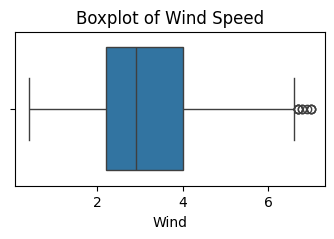

In [11]:
lower_bound = 0  # Lower bound for wind speed
upper_bound = 7  # Upper bound for wind speed

# Remove outliers that fall outside the specified range
df = df[(df['wind'] >= lower_bound) & (df['wind'] <= upper_bound)]

# Print the trimmed df
print(df.describe())

plt.figure(figsize=(4, 2))
sns.boxplot(data=df, x=df['wind'], orient='h')
plt.title(f'Boxplot of Wind Speed')
plt.xlabel('Wind')
plt.show()


Scatter Plot of temp_min vs. temp_max

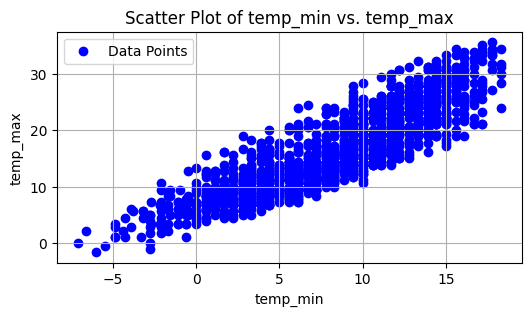

In [74]:
plt.figure(figsize=(6, 3))
plt.scatter(df['temp_min'], df['temp_max'], c='blue', marker='o', label='Data Points')
plt.xlabel('temp_min')
plt.ylabel('temp_max')
plt.title('Scatter Plot of temp_min vs. temp_max')
plt.grid(True)
plt.legend()
plt.show()

Bar Chart of weather 

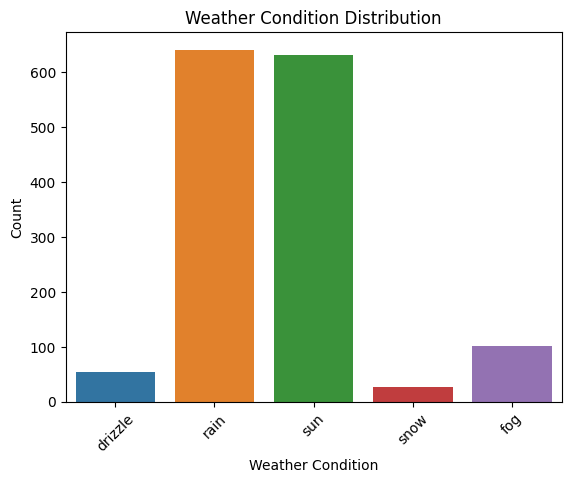

In [75]:
import seaborn as sns

sns.countplot(x='weather', data=df)
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.title('Weather Condition Distribution')
plt.xticks(rotation=45)
plt.show()


The Correlation Matix of Attributes

               precipitation  temp_max  temp_min      wind
precipitation       1.000000 -0.227996 -0.072052  0.327779
temp_max           -0.227996  1.000000  0.875264 -0.166628
temp_min           -0.072052  0.875264  1.000000 -0.075805
wind                0.327779 -0.166628 -0.075805  1.000000


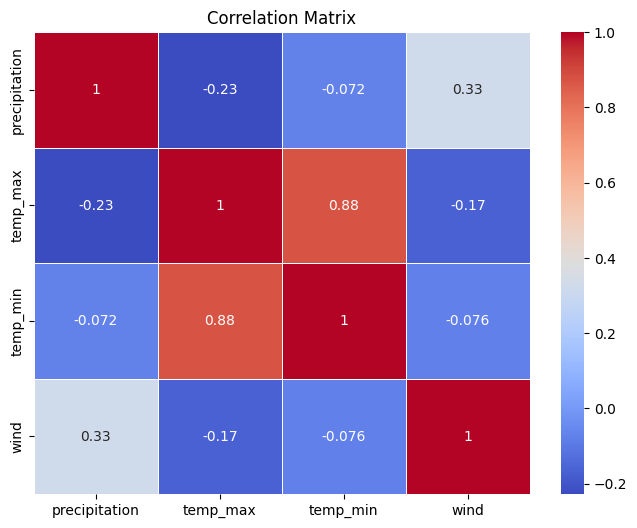

In [76]:
selected_attributes = ['precipitation', 'temp_max', 'temp_min', 'wind']
correlation_matrix = df[selected_attributes].corr()

print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Splitting The Independent Variables and Dependent Variables 

In [6]:
x = df.drop(columns=['weather'])
y = df['weather']
print('The independent variables:')
print(x.head(5))
print('The dependent variable:')
print(y.head(5))

The independent variables:
   precipitation  temp_max  temp_min  wind
0            0.0      12.8       5.0   4.7
1           10.9      10.6       2.8   4.5
2            0.8      11.7       7.2   2.3
3           20.3      12.2       5.6   4.7
4            1.3       8.9       2.8   6.1
The dependent variable:
0    drizzle
1       rain
2       rain
3       rain
4       rain
Name: weather, dtype: object


Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(f"Training size: {x_train.shape}")
print(f"Testing size: {x_test.shape}")


Training size: (1162, 4)
Testing size: (291, 4)


Using Decision Tree Classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

predictions = model.predict(x_test)

accuracy= accuracy_score(y_test,predictions)
print(f"The actual score: {accuracy}")

print(model.predict([[0.0,25,10,1]]))
print(model.predict([[0.0,12.8,5.0,4.7 ]]))
print(model.predict([[5.9,10.6,2.8,4.5 ]]))
print(model.predict([[0.0,0 ,-5.4,1]]))

The actual score: 0.7663230240549829
['sun']
['sun']
['snow']
['fog']


In [9]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=list(x_train.columns),
          class_names=sorted(y.unique()),
          rounded=True, filled=True)
plt.show()

NameError: name 'plt' is not defined

Using KNN Model

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
score = accuracy_score(y_test,pred)
print(f'accuracy score : {score}')

accuracy score : 0.7147766323024055


Calculating the accuracy for each k value 

In [81]:
accuracy_scores={}
for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    
    y_pred = knn_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("k:", k)
    print("accuracy:", accuracy)
    
    accuracy_scores[k] = accuracy


k: 1
accuracy: 0.718213058419244
k: 2
accuracy: 0.6529209621993127
k: 3
accuracy: 0.7285223367697594
k: 4
accuracy: 0.7835051546391752
k: 5
accuracy: 0.8041237113402062
k: 6
accuracy: 0.7869415807560137
k: 7
accuracy: 0.7869415807560137
k: 8
accuracy: 0.7697594501718213
k: 9
accuracy: 0.7869415807560137
k: 10
accuracy: 0.7835051546391752
k: 11
accuracy: 0.7903780068728522
k: 12
accuracy: 0.7869415807560137
k: 13
accuracy: 0.7903780068728522
k: 14
accuracy: 0.7835051546391752
k: 15
accuracy: 0.7800687285223368
k: 16
accuracy: 0.7835051546391752
k: 17
accuracy: 0.7800687285223368
k: 18
accuracy: 0.7731958762886598
k: 19
accuracy: 0.7800687285223368
k: 20
accuracy: 0.7766323024054983


Choosing the right k

In [82]:
best_k = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_k]
print("Best k:", best_k)
print("Best accuracy:", best_accuracy)

Best k: 5
Best accuracy: 0.8041237113402062


Training the KNN model

In [83]:
import warnings
warnings.filterwarnings("ignore")

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

print(model.predict([[0,25,10,10]]))
print(model.predict([[ 0.0 ,12.8,5.0 ,4.7 ]]))
print(model.predict([[ 5.9 , 10.6 , 2.8 ,4.5 ]]))
print(model.predict([[ 0.0 ,0 ,-5.4,1]]))

['sun']
['drizzle']
['rain']
['drizzle']


Using Random Forest Classifier

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Encode the categorical 'weather' labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(x_train, y_train_encoded)
pred = rf_classifier.predict(x_test)
score = accuracy_score(pred,y_test_encoded)
print(f'The accuracy score : {score}')

The accuracy score : 0.8384879725085911


Predicting The Results 

In [86]:
import warnings
warnings.filterwarnings("ignore")

encoded_classes = label_encoder.classes_

print("Encoded Classes:", encoded_classes)
print(label_encoder.inverse_transform(rf_classifier.predict([[0,25,10,1]])))
print(label_encoder.inverse_transform(rf_classifier.predict([[0.0,12.8,5.0,4.7]])))
print(label_encoder.inverse_transform(rf_classifier.predict([[5.9,10.6,2.8,4.5]])))
print(label_encoder.inverse_transform(rf_classifier.predict([[0.0,7.2,0.6,2.6]])))


Encoded Classes: ['drizzle' 'fog' 'rain' 'snow' 'sun']
['sun']
['drizzle']
['rain']
['fog']
